In [ ]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [44]:
online_file = '/work/aes/projects/offline_online_comparison/OM4_05/online/01010101.prog.nc'
woa09_file = '/work/aes/projects/offline_online_comparison/OM4_05/offline_woa09/01510101.off_diag.nc'
grid_file = '/archive/miz/mdt/20170324/CM4_c96L33_am4p0_2010_OMp5_H5_ndiff_meke_MLE30d_ePBLn/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ocean_annual.static.nc'
geolat = nc.Dataset(grid_file).variables['geolat'][:,:]
geolon = nc.Dataset(grid_file).variables['geolon'][:,:]
lat = nc.Dataset(grid_file).variables['yh'][:]
lon = nc.Dataset(grid_file).variables['xh'][:]

In [48]:
age_woa09 = nc.Dataset(woa09_file).variables['age'][-1,:,:,:]
depth_woa09 = nc.Dataset(woa09_file).variables['z_l'][:]

In [46]:
age_online = nc.Dataset(online_file).variables['age'][:,:,:,:].mean(axis=0)
depth_online = nc.Dataset(online_file).variables['z_l'][:].squeeze()

<IPython.core.display.Javascript object>


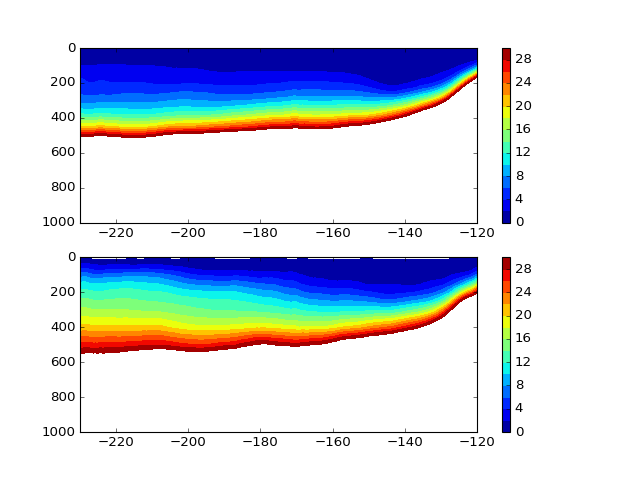

In [59]:
P02_idx = np.argmin(np.abs(lat-25.))
maxdepth = 1000
maxage = 32
dage = 2
plt.figure()
plt.subplot(2,1,2)
plt.contourf(lon,depth_woa09,age_woa09[:,P02_idx,:],np.arange(0,maxage,dage))
plt.colorbar()
plt.xlim(-230,-120)
plt.ylim(0,maxdepth)
plt.gca().invert_yaxis()
plt.subplot(2,1,1)
plt.contourf(lon,depth_online,age_online[:,P02_idx,:],np.arange(0,maxage,dage))
plt.colorbar()
plt.xlim(-230,-120)
plt.ylim(0,maxdepth)
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


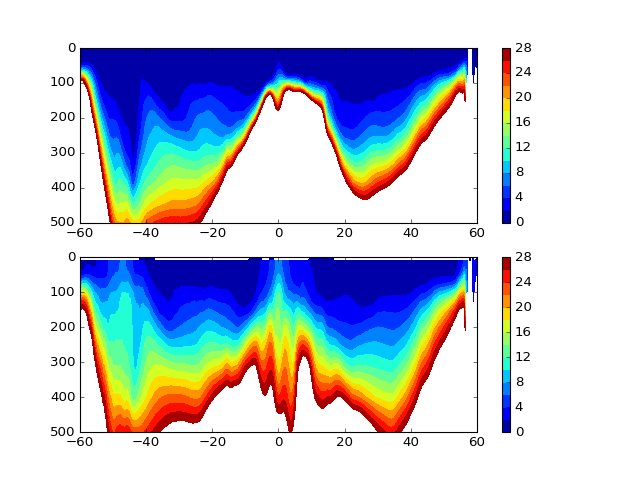

In [58]:
maxdepth = 500
maxage = 30
dage = 2
P16_idx = np.argmin(np.abs(lon-(-152.)))
plt.figure()
plt.subplot(2,1,2)
plt.contourf(lat,depth_woa09,age_woa09[:,:,P16_idx],np.arange(0,maxage,dage))
plt.colorbar()
plt.xlim(-60,60)
plt.ylim(0,maxdepth)
plt.gca().invert_yaxis()
plt.subplot(2,1,1)
plt.contourf(lat,depth_online,age_online[:,:,P16_idx],np.arange(0,maxage,dage))
plt.colorbar()
plt.xlim(-60,60)
plt.ylim(0,maxdepth)
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


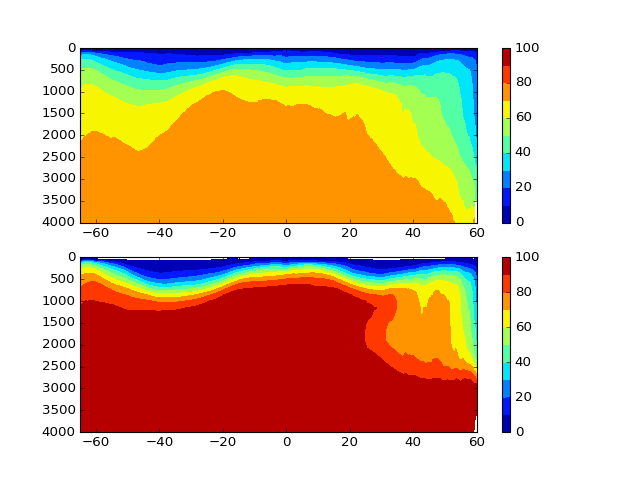

In [57]:
minlat = -65
maxlat = 60
maxdepth = 4000
maxage = 110
P16_idx = np.argmin(np.abs(lon-(-152.)))
plt.figure()
plt.subplot(2,1,1)
plt.contourf(lat,depth_woa09,age_woa09.mean(axis=2),np.arange(0,maxage,10))
plt.colorbar()
plt.xlim(minlat,maxlat)
plt.ylim(0,maxdepth)
plt.gca().invert_yaxis()
plt.subplot(2,1,2)
plt.contourf(lat,depth_online,age_online.mean(axis=2)-1,np.arange(0,maxage,10))
plt.colorbar()
plt.xlim(minlat,maxlat)
plt.ylim(0,maxdepth)
plt.gca().invert_yaxis()